### Ensemble Learning
- this technique consists on combining individual estimators(for both classification and regression tasks) to make an even better estimator
- Common techniques are: bagging, boosting and stacking
- A famous algorithm in this type of statistical learning is the Random Forest, in which we train many individual Decision Trees with different random subsets of the training data and then get the final prediction

#### Voting Classifier
- A common technique is based on the concept of *hard voting classifier*
- the workflow is as follows: imagine we are dealing with a classification task and we train different algorithms (such Logistic Regression, KNN, Decision Tree, SVM, etc). 
- Once we have each algorithm trained, we apply each of them to a unknown instance and so we end up having n estimations, where n is the number of algorithms used.
- Let's say we have n = 5 and our problem is binary. If 4 of them estimates the class as being 1 and only one estimates the class being 0, then, by using the voting system, we classify the instance as being 1.

- **NOTE**: combining different algorithms is better than training many equal algorithms, since this implies making different types of errors and better estimations!

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [ ]:
X,y = make_moons(n_samples=10000,noise=0.1,random_state=4)
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=.7,random_state=42)

In [ ]:
rf = RandomForestClassifier()
svc = SVC()
lr = LogisticRegression()
voting_clf = VotingClassifier(
    estimators=[('log_reg',LogisticRegression()),('rf',rf),('svc',svc)],
    voting='hard'
)

In [ ]:
from sklearn.metrics import accuracy_score
for clf in [rf,svc,lr, voting_clf]:
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    print(clf.__class__.__name__,accuracy_score(y_test, pred))

RandomForestClassifier 0.998
SVC 0.9996666666666667
LogisticRegression 0.883
VotingClassifier 0.9986666666666667


The Voting Classifier is better than the single Logistic Regression, for example!

#### Bagging and Pasting
- They correspond to an ensemble method, in which instead of using different algorithms , we use the same kind of algorithm , and each of them will deal with a random subset of the training set
- This subset can be sampled with replacement (bagging) or without replacement(pasting)
- Each instance can appear in multiple subsets , but **only** on bagging we can see the same instance appearing 2 times or more.
- Once we have each subset , we train the estimators and then get the final prediction, which can be the mode of the classes among all the estimators (in case of classification) or the averaged value (in case of regression)
- In terms of generalization, the ensemble using bagging has similar bias to an individual estimator, but smaller variance (smoother decision boundary)

![Picture title](image-20220430-163926.png)

Extracted from: https://livebook.manning.com/book/ensemble-methods-for-machine-learning/chapter-2/v-1/

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True
)

bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)
print('Accuracy:',accuracy_score(y_test, y_pred))

Accuracy: 0.9786666666666667


#### Random Forests
- a famous ensemble algorithm based on many Decision Trees
- unlike individual decision trees, each tree of the forest searches for the best feature among a random subset of features, instead of looking for the best feature among all the features available
- **NOTE**: there is a version of this algorithm for regression tasks called RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print('Accuracy:',accuracy_score(y_test, y_pred))

Accuracy: 0.9926666666666667


#### Extra-Trees (*Extremely Randomized Trees*)
- this is a variation of Random forest, in which for each feature used to split a node, a **random** threshold is also used
- this implies more bias, but provides lower variance
- **NOTE**: there is a version of this algorithm for regression tasks called ExtraTreesRegressor

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

extra_tr = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16)
extra_tr.fit(x_train, y_train)
y_pred = extra_tr.predict(x_test)
print('Accuracy:',accuracy_score(y_test, y_pred))

Accuracy: 0.9906666666666667


#### Feature Importance
- this is a special component of Random Forests in which we are able to identify which features were the most important ones for the decisions made
- it is computed after training and its essence relies on the following question: based on the tree nodes that used the feature X for split, how much did the impurity decay on average, across all trees? Obviously, the amount of samples that each node has is not equal, so it is weighted average!
- The sum of the feature importances is 1

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

iris_data = load_iris()
x, y = iris_data["data"], iris_data["target"]
rf = RandomForestClassifier(n_estimators=500)
rf.fit(x, y)

for name, imp in zip(iris_data["feature_names"], rf.feature_importances_):
    print(name, imp)


sepal length (cm) 0.10754617240159234
sepal width (cm) 0.02238765237823825
petal length (cm) 0.4333848534861368
petal width (cm) 0.4366813217340326


Petal length and petal width are the most important features for this problem! 

#### Boosting
- this technique differs from bagging in terms of how the ensemble works: instead of fitting parallel predictors, the predictors are fitted sequentially
- famous techniques: *AdaBoost* and *Gradient Boosting* 

#### Adaboost
- the main idea is: for each step during learning, the actual predictor tries to learn better the errors made by the predictor in the preceding step
- after training at each step, the weights associated with each instance is updated so that the instances that were misclassified receives a higher weight, used by the upcoming predictor in the sequence
- the updated weight for misclassified instance is a product between the instance's weight in the preceding step and the predictor's weight, given by (1 - error_ratio)/error_ratio, where error ration is given by the sum of weights of misclassified instances over the sum of all instances

In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X,y = make_moons(n_samples=10000,noise=0.1,random_state=4)
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=.7,random_state=42)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),n_estimators=200,
    algorithm='SAMME.R',learning_rate=0.5
)
ada.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

#### Gradient boosting
- just like Adaboost, it works sequentially and the new predictor tries to correct the preceding predictor
- what changes: instead of updating the misclassified instances at every iteration, the new predictor works on the residuals made by the preceding predictor

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X = np.random.randn(100)
y = 3+X**2 + 0.5*np.random.randn(100)

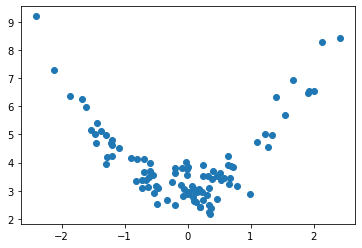

In [ ]:
plt.scatter(X,y)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gdb = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1)
gdb.fit(X.reshape(-1,1),y)

GradientBoostingRegressor(learning_rate=1, max_depth=2, n_estimators=3)

Learning rate corresponds to the amount of trees in the ensemble to fit the training data. If it is set too low, it will be needed more trees, but they will usually generalize better. It is necessary to validate the amount of regularization required, since many predictors might introduce overfitting.

In [ ]:
from sklearn.metrics import mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(X.reshape(-1,1),y)

gdb = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gdb.fit(x_train, y_train)

errors = [mean_squared_error(y_test,y_pred) for y_pred in
          gdb.staged_predict(x_test)]

best_n_estimator = np.argmin(errors) + 1

gdb_best = GradientBoostingRegressor(max_depth=2, n_estimators=best_n_estimator)
gdb_best.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=63)

Text(0.5, 1.0, 'Validation error')

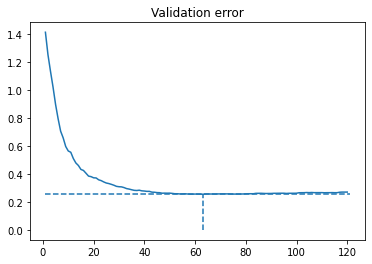

In [ ]:
plt.plot(np.arange(1,121),errors)
plt.hlines(min(errors),1,121,linestyles='--')
plt.vlines(best_n_estimator,0,min(errors),linestyles='--')
plt.title('Validation error')

#### Stacking
- this technique has an unique aspect: instead of making predictions using hard voting technique for example, we create a model to do the aggregation, called *blender*
- the steps are as follows:
    - split the training set into two parts (say part 1 and part 2)
    - train different models using part 1
    - apply these models to part 2 (never seen during training)
    - for each instance on part 2, there are n prediction (where n is the number of predictors used)
    - create a new training set with n-dimensions plus the original target
        - this way, the blender will know how to make predictions for an instance using the predictions from different models
    - train the blender
    - once we have a new instance, apply the stacking

![Picture title](image-20220503-080309.png)
Extracted from: https://vatsalparsaniya.github.io/ML_Knowledge/Stacking/README.html

Stacking is not directly implemented by Scikit-learn, but the steps can be effortlessly done!

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2b7eb737-18d4-4683-a9e5-3ea902dd423b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>